<pre>
1. Download the data from <a href='https://drive.google.com/file/d/15dCNcmKskcFVjs7R0ElQkR61Ex53uJpM/view?usp=sharing'>here</a>

2. Code the model to classify data like below image

<img src='https://i.imgur.com/33ptOFy.png'>

3. Write your own callback function, that has to print the micro F1 score and AUC score after each epoch.

4. Save your model at every epoch if your validation accuracy is improved from previous epoch. 

5. you have to decay learning based on below conditions 
        Cond1. If your validation accuracy at that epoch is less than previous epoch accuracy, you have to decrese the
               learning rate by 10%. 
        Cond2. For every 3rd epoch, decay your learning rate by 5%.
        
6. If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training. 

7. You have to stop the training if your validation accuracy is not increased in last 2 epochs.

8. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

9. use cross entropy as loss function

10. Try the architecture params as given below. 
</pre>

<pre>
<b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-3</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-4</b>
<pre>
1. Try with any values to get better accuracy/f1 score.  
</pre>
</pre>

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [320]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, TensorBoard, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K
from tensorflow.keras.initializers import RandomUniform, HeUniform
from tensorflow.keras.optimizers import SGD, Adam
import datetime

# Loading data

In [267]:
data=pd.read_csv('/content/drive/MyDrive/AAIC/20_Working with Callbacks/data.csv')       #load the data

In [205]:
data.shape

(20000, 3)

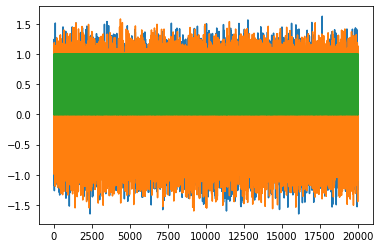

In [206]:

plt.plot(data)
plt.show()

In [207]:
data

,f1,f2,label
0,0.450564,1.074305,0.0
1,0.085632,0.967682,0.0
2,0.117326,0.971521,1.0
3,0.982179,-0.380408,0.0
4,-0.720352,0.955850,0.0
...,...,...,...
19995,-0.491252,-0.561558,0.0
19996,-0.813124,0.049423,1.0
19997,-0.010594,0.138790,1.0
19998,0.671827,0.804306,0.0


# Separating class lables and data point(X, Y)

In [268]:
y=data['label'].values

In [269]:
y

array([0., 0., 1., ..., 1., 0., 0.])

In [270]:
X=data.drop('label', axis=1)

In [271]:
X

,f1,f2
0,0.450564,1.074305
1,0.085632,0.967682
2,0.117326,0.971521
3,0.982179,-0.380408
4,-0.720352,0.955850
...,...,...
19995,-0.491252,-0.561558
19996,-0.813124,0.049423
19997,-0.010594,0.138790
19998,0.671827,0.804306


# Split the data into train test

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, stratify=y)

In [273]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13400, 2), (6600, 2), (13400,), (6600,))

In [274]:
X_train.shape[1]

2

In [275]:
y_train.shape

(13400,)

In [276]:
#https://www.w3schools.com/python/python_inheritance.asp
#roc_callback funtion

class roc_callback(Callback):
    def __init__(self,train_data,test_data):
        self.x_train = train_data[0]
        self.y_train_ = train_data[1]
        self.x_test = test_data[0]
        self.y_test_ = test_data[1]

    def on_epoch_end(self, epoch, logs={}):                             #after the end of epoch values
        y_train_predicted = self.model.predict(self.x_train)              #y_i^'s for train data
        roc_train = roc_auc_score(self.y_train_, y_train_predicted)
        y_test_predicted = self.model.predict(self.x_test)               #y_i^'s for test data'
        roc_test = roc_auc_score(self.y_test_, y_test_predicted)
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_test,4))),end=100*' '+'\n')
        return

roc = roc_callback(train_data=(X_train, y_train),
test_data=(X_test, y_test))

In [277]:
def change_in_learning_rate(epoch):
    '''This function returns the reduced learning rate'''  
    initial_learning_rate=0.1
    changed_learning_rate=initial_learning_rate*(1-0.1)**epoch
    return changed_learning_rate

In [278]:
change_in_learning_rate(5)

0.05904900000000001

In [279]:
change_in_learning_rate(50)

0.000515377520732012

In [295]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomUniform

def create_model():
    '''This function returns the created model where function calll happned'''
    return Sequential([
                     Dense(2, input_shape=(2,), kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='input_layer'),
                     Dense(512, activation='tanh', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer1'),
                     Dense(256, activation='tanh', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer2'),
                     Dense(128, activation='tanh', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer3'),
                     Dense(256, activation='tanh', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer4'),
                     Dense(512, activation='tanh', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer5'),
                     Dense(1, activation='sigmoid', name='output_layer'),])

In [281]:
#stop the process if any NaN values occurs

class terminate_NaN(Callback):
    def epoch_end(self, epoch, logs={}):
        loss=logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
            print("Invalid loss and Process terminate at epoch {}".format(epoch))
            self.model.stop_training=True

In [282]:
test_data=(X_test, y_test)
train_data=(X_train, y_train)

In [283]:
test_data

(             f1        f2
 2645  -0.692666 -0.527750
 3595   0.063350  0.853141
 1930  -0.901121 -0.266501
 8443   0.206574  0.675552
 6313  -0.215944  0.885498
 ...         ...       ...
 14518  1.077503  0.048011
 9117   1.264921 -0.013589
 12833 -0.087891 -0.990886
 4586   0.460298  0.931480
 8990   1.026567 -0.666641
 
 [6600 rows x 2 columns], array([1., 1., 1., ..., 0., 0., 0.]))

In [284]:
train_data

(             f1        f2
 18537  0.331026  0.503821
 12051 -0.692862 -0.887757
 3635   0.176662  0.652672
 6895   1.080582  0.132655
 113   -1.170275  0.477978
 ...         ...       ...
 314    0.581259  0.828587
 9468   0.902993  0.341664
 7094  -0.153314  0.940698
 15570  0.614579  0.358764
 3991  -0.486305 -0.382064
 
 [13400 rows x 2 columns], array([1., 0., 1., ..., 1., 1., 1.]))

In [285]:
#import required librarires
from sklearn.metrics import roc_auc_score

#this class is used to return the f1 score, precision and recall
class metrics(Callback):
    def on_train_begin(self, logs={}):
        self.value_f1_score = []                    #to store f1 score
        self.value_recalls = []                     #to store recall 
        self.value_precisions = []                  #to store precision
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(X_test))).round()     #to get in numpy array 
        val_targ = y_test
        val_f1 = f1_score(val_targ, val_predict)                           #to get f1 score
        val_recall = recall_score(val_targ, val_predict)                   #to get recall
        val_precision = precision_score(val_targ, val_predict)             #to get precission
        self.value_f1_score.append(val_f1)
        self.value_recalls.append(val_recall)
        self.value_precisions.append(val_precision)
        print ( "- f1 score %f - precision %f - recall %f" %(val_f1, val_precision, val_recall))
        return

metrics_f1_score=metrics()

In [286]:
metrics_f1_score

## **Model 1**

In [312]:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

#Model1

model_no1=create_model()
optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")
model_no1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# log_directory="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback=TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True)

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

terminate_nan=terminate_NaN()
file_path="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"

check_point=ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop=EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
reduce_accuracy=ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=1, verbose=1, mode='auto')
reduce_lr_for_3epoch=ReduceLROnPlateau(factor=0.9, patience=3, verbose=1)

callbacks_list=[check_point, tensorboard_callback, early_stop, reduce_accuracy, reduce_lr_for_3epoch, terminate_nan, metrics_f1_score, roc]

model_no1.fit(x=X_train,
              y=y_train,
              epochs=15,
              validation_data=(X_test, y_test),
              callbacks=[callbacks_list])

Epoch 1/15
419/419 [==============================] - 4s 9ms/step - loss: 0.6942 - accuracy: 0.4979 - val_loss: 0.6936 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to model_save/weights-01-0.5000.hdf5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- f1 score 0.000000 - precision 0.000000 - recall 0.000000
roc-auc_train: 0.4994 - roc-auc_val: 0.4969                                                                                                    
Epoch 2/15
419/419 [==============================] - 3s 8ms/step - loss: 0.6941 - accuracy: 0.5036 - val_loss: 0.6942 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.008999999798834325.
- f1 score 0.666667 - precision 0.500000 - recall 1.000000
roc-auc_train: 0.4994 - roc-auc_val: 0.4968                                                                                                    
Epoch 3/15
419/419 [==============================] - 4s 8ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.008099999651312828.
- f1 score 0.666667 - precision 0.5000

In [297]:
model_no1.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 512)               1536      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer3 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer4 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer5 (Dense)               (None, 512)               131584    
_________________________________________________________________
output_layer (Dense)         (None, 1)               

In [ ]:
%reload_ext tensorboard

In [ ]:
!rm -rf ./logs/

In [ ]:
%tensorboard --logdir='logs/fit'

# Model 2

In [314]:
def create_model():
    '''This function returns the created model where function calll happned'''
    return Sequential([
                     Dense(2, input_shape=(2,), kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='input_layer'),
                     Dense(512, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer1'),
                     Dense(256, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer2'),
                     Dense(128, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer3'),
                     Dense(256, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer4'),
                     Dense(512, activation='relu', kernel_initializer=RandomUniform(minval=-0.05, maxval=0.05, seed=None), name='layer5'),
                     Dense(1, activation='sigmoid', name='output_layer'),])

In [315]:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


#Model2

model_no2=create_model()
optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")
model_no2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# log_directory="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback=TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True)

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

terminate_nan=terminate_NaN()
file_path="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"

check_point=ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop=EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
reduce_accuracy=ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=1, verbose=1, mode='auto')
reduce_lr_for_3epoch=ReduceLROnPlateau(factor=0.9, patience=3, verbose=1)

callbacks_list=[check_point, tensorboard_callback, early_stop, reduce_accuracy, reduce_lr_for_3epoch, terminate_nan, metrics_f1_score, roc]

model_no2.fit(x=X_train,
              y=y_train,
              epochs=15,
              validation_data=(X_test, y_test),
              callbacks=[callbacks_list])

Epoch 1/15
419/419 [==============================] - 4s 9ms/step - loss: 0.6931 - accuracy: 0.5077 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to model_save/weights-01-0.5000.hdf5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- f1 score 0.000000 - precision 0.000000 - recall 0.000000
roc-auc_train: 0.4512 - roc-auc_val: 0.4344                                                                                                    
Epoch 2/15
419/419 [==============================] - 3s 8ms/step - loss: 0.6934 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.008999999798834325.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- f1 score 0.000000 - precision 0.000000 - recall 0.000000
roc-auc_train: 0.5022 - roc-auc_val: 0.5024                                                                                                    
Epoch 3/15
419/419 [==============================] - 3s 8ms/step - loss: 0.6934 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.008099999651312828.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- f1 score 0.000000 - precision 0.000000 - recall 0.000000
roc-auc_train: 0.5 - roc-auc_val: 0.5                                                                                                    
Epoch 00003: early stopping


In [316]:
model_no2.summary()


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 512)               1536      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer3 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer4 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer5 (Dense)               (None, 512)               131584    
_________________________________________________________________
output_layer (Dense)         (None, 1)               

In [ ]:
%reload_ext tensorboard

%tensorboard --logdir='/content/logs/fit/20210921-100537'

# Model 3

In [323]:
def create_model():
  '''This function returns the created model where function calll happned'''
  return Sequential([
                     Dense(2, input_shape=(2,), kernel_initializer=HeUniform(), name='input_layer'),
                     Dense(512, activation='relu', kernel_initializer=HeUniform(), name='layer1'),
                     Dense(256, activation='relu', kernel_initializer=HeUniform(), name='layer2'),
                     Dense(128, activation='relu', kernel_initializer=HeUniform(), name='layer3'),
                     Dense(256, activation='relu', kernel_initializer=HeUniform(), name='layer4'),
                     Dense(512, activation='relu', kernel_initializer=HeUniform(), name='layer5'),
                     Dense(1, activation='sigmoid', name='output_layer'),
  ])

In [324]:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

#Model2

model_no3=create_model()
optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")
model_no3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# log_directory="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback=TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True)

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

terminate_nan=terminate_NaN()
file_path="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"

check_point=ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop=EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
reduce_accuracy=ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=1, verbose=1, mode='auto')
reduce_lr_for_3epoch=ReduceLROnPlateau(factor=0.9, patience=3, verbose=1)

callbacks_list=[check_point, tensorboard_callback, early_stop, reduce_accuracy, reduce_lr_for_3epoch, terminate_nan, metrics_f1_score, roc]

model_no3.fit(x=X_train,
              y=y_train,
              epochs=15,
              validation_data=(X_test, y_test),
              callbacks=[callbacks_list])

Epoch 1/15
419/419 [==============================] - 4s 9ms/step - loss: 0.6772 - accuracy: 0.5843 - val_loss: 0.6360 - val_accuracy: 0.6530

Epoch 00001: val_accuracy improved from -inf to 0.65303, saving model to model_save/weights-01-0.6530.hdf5
- f1 score 0.656980 - precision 0.649585 - recall 0.664545
roc-auc_train: 0.7097 - roc-auc_val: 0.7074                                                                                                    
Epoch 2/15
419/419 [==============================] - 3s 8ms/step - loss: 0.6395 - accuracy: 0.6331 - val_loss: 0.6255 - val_accuracy: 0.6483

Epoch 00002: val_accuracy did not improve from 0.65303

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.008999999798834325.
- f1 score 0.614131 - precision 0.680295 - recall 0.559697
roc-auc_train: 0.7185 - roc-auc_val: 0.7138                                                                                                    
Epoch 3/15
419/419 [==============================] - 3s 8ms/step 

In [325]:
model_no3.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 512)               1536      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer3 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer4 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer5 (Dense)               (None, 512)               131584    
_________________________________________________________________
output_layer (Dense)         (None, 1)               

In [ ]:
%reload_ext tensorboard

%tensorboard --logdir='/content/logs/fit/20210921-101723'

# Model 4

In [329]:
def create_model():
  '''This function returns the created model where function calll happned'''
  return Sequential([
                     Dense(2, input_shape=(2,), kernel_initializer=HeUniform(), name='input_layer'),
                     Dense(512, activation='softmax', kernel_initializer=HeUniform(), name='layer1'),
                     Dense(256, activation='softmax', kernel_initializer=HeUniform(), name='layer2'),
                     Dense(128, activation='softmax', kernel_initializer=HeUniform(), name='layer3'),
                     Dense(256, activation='softmax', kernel_initializer=HeUniform(), name='layer4'),
                     Dense(512, activation='softmax', kernel_initializer=HeUniform(), name='layer5'),
                     Dense(1, activation='softmax', name='output_layer'),
  ])

In [331]:
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping



#Model4

model_no4=create_model()
optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")
model_no4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# log_directory="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback=TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True)

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

terminate_nan=terminate_NaN()
file_path="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"

check_point=ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop=EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
reduce_accuracy=ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=1, verbose=1, mode='auto')
reduce_lr_for_3epoch=ReduceLROnPlateau(factor=0.9, patience=3, verbose=1)

callbacks_list=[check_point, tensorboard_callback, early_stop, reduce_accuracy, reduce_lr_for_3epoch, terminate_nan, metrics_f1_score, roc]

model_no4.fit(x=X_train,
              y=y_train,
              epochs=15,
              validation_data=(X_test, y_test),
              callbacks=[callbacks_list])

Epoch 1/15
419/419 [==============================] - 5s 9ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to model_save/weights-01-0.5000.hdf5
- f1 score 0.666667 - precision 0.500000 - recall 1.000000
roc-auc_train: 0.5 - roc-auc_val: 0.5                                                                                                    
Epoch 2/15
419/419 [==============================] - 4s 9ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.008999999798834325.
- f1 score 0.666667 - precision 0.500000 - recall 1.000000
roc-auc_train: 0.5 - roc-auc_val: 0.5                                                                                                    
Epoch 3/15
419/419 [==============================] - 4s 9ms/step - loss: 0.69

In [332]:
model_no4.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 512)               1536      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer3 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer4 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer5 (Dense)               (None, 512)               131584    
_________________________________________________________________
output_layer (Dense)         (None, 1)               

In [ ]:
%reload_ext tensorboard

%tensorboard --logdir='/content/logs/fit/20210921-102631'

# Model 5

In [334]:
def create_model():
  '''This function returns the created model where function calll happned'''
  return Sequential([
                     Dense(2, input_shape=(2,), kernel_initializer=HeUniform(), name='input_layer'),
                     Dense(512, activation='relu', kernel_initializer=HeUniform(), name='layer1'),
                     Dense(256, activation='relu', kernel_initializer=HeUniform(), name='layer2'),
                     Dense(128, activation='relu', kernel_initializer=HeUniform(), name='layer3'),
                     Dense(256, activation='relu', kernel_initializer=HeUniform(), name='layer4'),
                     Dense(512, activation='relu', kernel_initializer=HeUniform(), name='layer5'),
                     Dense(1, activation='softmax', name='output_layer'),
  ])

In [336]:
#https://keras.io/api/optimizers/
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
#Model5

model_no5=create_model()
# optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_no5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# log_directory="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback=TensorBoard(log_dir=log_directory, histogram_freq=1, write_graph=True)

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

terminate_nan=terminate_NaN()
file_path="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"

check_point=ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop=EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
reduce_accuracy=ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=1, verbose=1, mode='auto')
reduce_lr_for_3epoch=ReduceLROnPlateau(factor=0.9, patience=3, verbose=1)

callbacks_list=[check_point, tensorboard_callback, early_stop, reduce_accuracy, reduce_lr_for_3epoch, terminate_nan, metrics_f1_score, roc]

model_no5.fit(x=X_train,
              y=y_train,
              epochs=15,
              validation_data=(X_test, y_test),
              callbacks=[callbacks_list])

Epoch 1/15
419/419 [==============================] - 5s 10ms/step - loss: 0.7410 - accuracy: 0.5000 - val_loss: 0.6494 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to model_save/weights-01-0.5000.hdf5
- f1 score 0.666667 - precision 0.500000 - recall 1.000000
roc-auc_train: 0.5 - roc-auc_val: 0.5                                                                                                    
Epoch 2/15
419/419 [==============================] - 4s 9ms/step - loss: 0.6357 - accuracy: 0.5000 - val_loss: 0.6178 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.008999999798834325.
- f1 score 0.666667 - precision 0.500000 - recall 1.000000
roc-auc_train: 0.5 - roc-auc_val: 0.5                                                                                                    
Epoch 3/15
419/419 [==============================] - 4s 9ms/step - loss: 0.6

In [337]:
model_no5.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 512)               1536      
_________________________________________________________________
layer2 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer3 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer4 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer5 (Dense)               (None, 512)               131584    
_________________________________________________________________
output_layer (Dense)         (None, 1)               

In [ ]:
%reload_ext tensorboard

%tensorboard --logdir='/content/logs/fit/20210921-103411'            #visalize throgh tensorboard

# Observation



1.   By looking at all 5 above models model 3 that is activation function relu except output layer giving more accuracy anf f1_score comapre to all other models


